###  Covid 19 Analysis for states in the south-east
### 1. What ethnic groups contain the most positive tests in each state?
### 2. What percentage of positive tests in each ethnic group in each state resulted in death?
### 3. Which ethnic group had the most COVID testing?
### Team members: Carline Philippe, Manar Soluiman, Burnetta Wood, Keishauna Turner and Spencer Fox
### Data taken from covidtraking.com



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read COVID-19 data file
covid19data_path = "Resources/CRDTData.csv"
covid19data_path2 = "Resources/all-states-history.csv"
covid19_initial_results_main = pd.read_csv(covid19data_path)

#Make a copy of Original DataFame
covid19_initial_results = covid19_initial_results_main.copy()
covid19_initial_results

covid19_initial_results = covid19_initial_results.loc[covid19_initial_results['Date'] == 20210307]
covid19_initial_results.head()



,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210307,AK,59332.0,18300.0,1499.0,NaN,2447.0,12238.0,1508.0,4453.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210307,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210307,AZ,826454.0,308453.0,25775.0,244539.0,11921.0,40707.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Select South East States as a focus for analysis

In [2]:

#covid_case_totals_positive = covid19_initial_results.reset_index()


covid_case_totals_positive = covid19_initial_results.loc[ (covid19_initial_results['State'] == 'NC') |
                                                          (covid19_initial_results['State'] == 'SC') |
                                                          (covid19_initial_results['State'] == 'GA') |
                                                          (covid19_initial_results['State'] == 'VA') |
                                                          (covid19_initial_results['State'] == 'AL') |
                                                          (covid19_initial_results['State'] == 'AR') |
                                                          (covid19_initial_results['State'] == 'FL') |
                                                          (covid19_initial_results['State'] == 'KY') |
                                                          (covid19_initial_results['State'] == 'TN') |
                                                          (covid19_initial_results['State'] == 'WV') |
                                                          (covid19_initial_results['State'] == 'MS') |
                                                          (covid19_initial_results['State'] == 'LA')]

covid_case_totals_positive

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,20210307,FL,1944995.0,664121.0,237772.0,608165.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,20210307,GA,1023487.0,319208.0,216068.0,85460.0,17888.0,504.0,746.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20210307,KY,410709.0,286431.0,26883.0,NaN,3680.0,833.0,374.0,16253.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20210307,LA,433785.0,218332.0,136460.0,NaN,16684.0,1527.0,492.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,20210307,MS,297581.0,140893.0,97848.0,6525.0,1415.0,2215.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,20210307,NC,872176.0,442322.0,146993.0,NaN,13620.0,11199.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,20210307,SC,525865.0,238659.0,107296.0,NaN,5178.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,20210307,TN,783484.0,489782.0,102220.0,NaN,6937.0,1032.0,564.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean dataset 

In [3]:
#Clean dataset by dropping the empty columns
covid_case_totals_positive = covid_case_totals_positive.drop(columns=['Tests_Total', 'Tests_Latinx','Tests_Asian', 'Tests_NHPI',
                                     'Tests_Multiracial', 'Tests_Other','Tests_Unknown',
                                     'Tests_Ethnicity_Hispanic', 'Tests_Ethnicity_NonHispanic',
                                      'Tests_Ethnicity_Unknown', 'Tests_White', 'Tests_Black', 'Tests_AIAN'
                                      ] )

covid_case_totals_positive

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Hosp_Latinx,Hosp_Asian,Hosp_AIAN,Hosp_NHPI,Hosp_Multiracial,Hosp_Other,Hosp_Unknown,Hosp_Ethnicity_Hispanic,Hosp_Ethnicity_NonHispanic,Hosp_Ethnicity_Unknown
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,20210307,FL,1944995.0,664121.0,237772.0,608165.0,NaN,NaN,NaN,NaN,...,20583.0,NaN,NaN,NaN,NaN,4284.0,3101.0,20583.0,56406.0,5248.0
11,20210307,GA,1023487.0,319208.0,216068.0,85460.0,17888.0,504.0,746.0,NaN,...,6155.0,1029.0,20.0,69.0,NaN,1076.0,2067.0,6155.0,46118.0,4524.0
19,20210307,KY,410709.0,286431.0,26883.0,NaN,3680.0,833.0,374.0,16253.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20210307,LA,433785.0,218332.0,136460.0,NaN,16684.0,1527.0,492.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,20210307,MS,297581.0,140893.0,97848.0,6525.0,1415.0,2215.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,20210307,NC,872176.0,442322.0,146993.0,NaN,13620.0,11199.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,20210307,SC,525865.0,238659.0,107296.0,NaN,5178.0,NaN,NaN,NaN,...,NaN,166.0,NaN,NaN,NaN,1166.0,1364.0,998.0,16674.0,3053.0
46,20210307,TN,783484.0,489782.0,102220.0,NaN,6937.0,1032.0,564.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#get the total of all cases in each SE state
covid_case_totals = covid_case_totals_positive.groupby(['State']).sum()
covid_case_totals

,Date,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,...,Hosp_Latinx,Hosp_Asian,Hosp_AIAN,Hosp_NHPI,Hosp_Multiracial,Hosp_Other,Hosp_Unknown,Hosp_Ethnicity_Hispanic,Hosp_Ethnicity_NonHispanic,Hosp_Ethnicity_Unknown
State,,,,,,,,,,,,,,,,,,,,,
AL,20210307,499819.0,160347.0,82790.0,0.0,2273.0,0.0,0.0,0.0,38000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,20210307,324818.0,207596.0,50842.0,0.0,2913.0,1070.0,3358.0,1804.0,16491.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FL,20210307,1944995.0,664121.0,237772.0,608165.0,0.0,0.0,0.0,0.0,141809.0,...,20583.0,0.0,0.0,0.0,0.0,4284.0,3101.0,20583.0,56406.0,5248.0
GA,20210307,1023487.0,319208.0,216068.0,85460.0,17888.0,504.0,746.0,0.0,36133.0,...,6155.0,1029.0,20.0,69.0,0.0,1076.0,2067.0,6155.0,46118.0,4524.0
KY,20210307,410709.0,286431.0,26883.0,0.0,3680.0,833.0,374.0,16253.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LA,20210307,433785.0,218332.0,136460.0,0.0,16684.0,1527.0,492.0,0.0,34552.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MS,20210307,297581.0,140893.0,97848.0,6525.0,1415.0,2215.0,0.0,0.0,10036.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NC,20210307,872176.0,442322.0,146993.0,0.0,13620.0,11199.0,0.0,0.0,98470.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC,20210307,525865.0,238659.0,107296.0,0.0,5178.0,0.0,0.0,0.0,57311.0,...,0.0,166.0,0.0,0.0,0.0,1166.0,1364.0,998.0,16674.0,3053.0


### Showing Totals from aggregated dataset

In [5]:
#general totals data
Cases_total = []
Hospital_Total = []
Deaths_Total= []


Cases_total = covid_case_totals['Cases_Total']
Hospital_Total = covid_case_totals['Hosp_Total']
Deaths_Total = covid_case_totals['Deaths_Total']
#States = covid_case_totals['state']

se_cases_total_df = pd.DataFrame({"Total Cases":Cases_total,
                                 "Total Hospital Cases":Hospital_Total,
                                 "Total Deaths":Deaths_Total}, dtype=int)
#display data
se_cases_total_df

,Total Cases,Total Hospital Cases,Total Deaths
State,,,
AL,499819,0,10148
AR,324818,0,5319
FL,1944995,82237,32266
GA,1023487,56797,17906
KY,410709,0,4819
LA,433785,0,9748
MS,297581,0,6808
NC,872176,0,11502
SC,525865,20725,8754


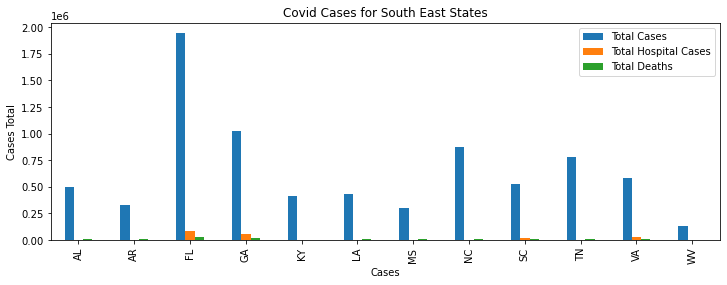

In [6]:
#graph se totals
se_cases_total_df.plot(kind='bar', figsize=(12,4))
plt.title("Covid Cases for South East States")
plt.xlabel("Cases")
plt.ylabel("Cases Total")
plt.savefig('Total Overview.jpg', dpi=300)
plt.show()


In [7]:
#chart showing basic stats on dataset
stats = se_cases_total_df.describe(include=[np.number])
stats.round(2)

,Total Cases,Total Hospital Cases,Total Deaths
count,12.00,12.00,12.00
mean,652988.67,15368.33,10894.83
std,479247.19,27290.17,7821.71
min,133445.00,0.00,2325.00
25%,389236.25,0.00,6435.75
50%,512842.00,0.00,9672.00
75%,805657.00,21709.00,11513.25
max,1944995.00,82237.00,32266.00


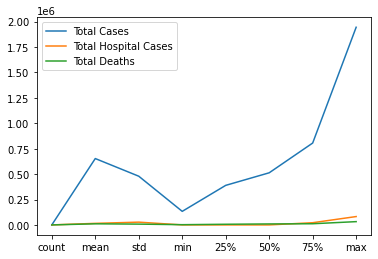

In [8]:
stats.plot()

### 1.a) Which SE state  had the most positive tests?

In [9]:
# Calculate Aggreagate  data for min and max by state
max_state = se_cases_total_df['Total Cases'].max()
min_state = se_cases_total_df.min()
avg_state =  se_cases_total_df.mean() 


maxValuesObj_most = se_cases_total_df.max(axis=1)
maxValuesObj_most

State
AL     499819
AR     324818
FL    1944995
GA    1023487
KY     410709
LA     433785
MS     297581
NC     872176
SC     525865
TN     783484
VA     585700
WV     133445
dtype: int32

### 1. b) Which SE state  had the least positive cases?

In [63]:
minValuesObj_least = se_cases_total_df.min(axis=1)
minValuesObj_least

State
AL        0
AR        0
FL    32266
GA    17906
KY        0
LA        0
MS        0
NC        0
SC     8754
TN        0
VA     9596
WV        0
dtype: int32

### 2. Which group had the lowest and highest survival rate per state?

In [11]:

# Highest survival rate % = total_cases - total_death/total_cases(same as positive) 
#Get subset of all groups

total_cases = se_cases_total_df['Total Cases'] 
total_deaths = se_cases_total_df['Total Deaths'] 
total_hospital_cases = se_cases_total_df['Total Hospital Cases']
state_index = se_cases_total_df.index
state_index

survival_rate = ((total_cases - total_deaths)/total_cases) * 100

survival_rate_t = survival_rate.map("{:,.2f}%".format)
survival_rate_df = pd.DataFrame({ "Survival Rate":survival_rate_t })

#survival_rate_df.mean()
survival_rate_df 

,Survival Rate
State,
AL,97.97%
AR,98.36%
FL,98.34%
GA,98.25%
KY,98.83%
LA,97.75%
MS,97.71%
NC,98.68%
SC,98.34%


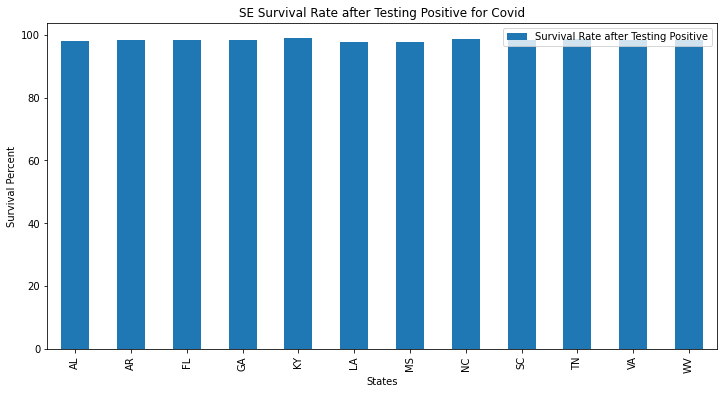

In [12]:
survival_rate_bar_df = pd.DataFrame({ "Survival Rate after Testing Positive":survival_rate })

survival_rate_bar_df.plot(kind='bar', figsize=(12,6))
plt.title("SE Survival Rate after Testing Positive for Covid")
plt.xlabel("States")
plt.ylabel("Survival Percent")
plt.savefig('Survival Percent.jpg', dpi=300)
plt.show()

In [13]:
#How many covid cases recorded in hospitals?
total_hospital_cases = se_cases_total_df['Total Hospital Cases']

total_hospital_cases

State
AL        0
AR        0
FL    82237
GA    56797
KY        0
LA        0
MS        0
NC        0
SC    20725
TN        0
VA    24661
WV        0
Name: Total Hospital Cases, dtype: int32

### What is the total covid hospital count?

In [14]:
total_hospital_cases_total = se_cases_total_df['Total Hospital Cases'].sum()
total_hospital_cases_total

184420

### Display Chart with hospital cases total  per state

Text(0, 0.5, 'Number of Cases recorded by Hospitals')

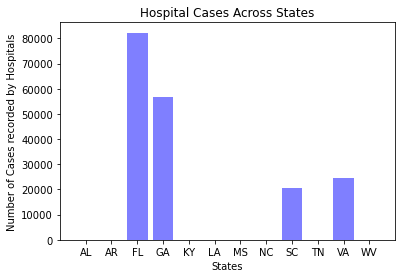

In [15]:
#Display Hospital cases per SE state
x_axis = total_hospital_cases.index #np.arange(len(total_hospital_cases))
plt.bar(x_axis, total_hospital_cases, color='b', alpha=0.5, align="center")
plt.title("Hospital Cases Across States")
plt.xlabel("States")
plt.ylabel("Number of Cases recorded by Hospitals")
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, [total_hospital_cases[0]])

### What percentage of the state's covid cases is reported as Hospital Cases?

In [16]:
#What percentage of hopital cases to totalcases per state ?
total_cases_h = se_cases_total_df['Total Cases'] 
hospital_case_percentage = (total_hospital_cases/total_cases_h) * 100
#hospital_case_percentage_t = hospital_case_percentage.map("{:,.2f}%".format)


hosp_percent_df = pd.DataFrame({"Hospital Case Percentage":hospital_case_percentage
                               })
hosp_percent_df

,Hospital Case Percentage
State,
AL,0.000000
AR,0.000000
FL,4.228134
GA,5.549362
KY,0.000000
LA,0.000000
MS,0.000000
NC,0.000000
SC,3.941126


In [17]:
#Calculate Hospital Cases Percentage
hospital_case_percentage_chart_values = hosp_percent_df.loc[hosp_percent_df["Hospital Case Percentage"] > 0]
hospital_case_percentage_chart_values

,Hospital Case Percentage
State,
FL,4.228134
GA,5.549362
SC,3.941126
VA,4.210517


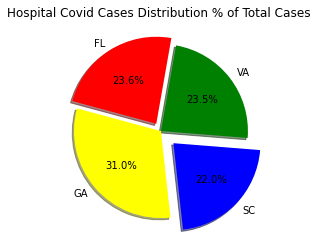

In [18]:
#Display a chart showing results for amount greater than zero
#Generate a pie plot showing the distribution of Hospital cases to total cases.

state_hosp_percent = hospital_case_percentage_chart_values['Hospital Case Percentage'] #.value_counts()

# Labels for the sections of our pie chart
labels = hospital_case_percentage_chart_values.index #["FL", "Male"]

# The y values of each section of the pie chart
sizes = state_hosp_percent  

# The colors of each section of the pie chart
colors = ["red", "yellow", "blue", "green"]

# Tells matplotlib to seperate sections
explode = (0.1, 0, 0.2, 0)


# Generate a pie plot showing the distribution of hospital cases versus total covid cases reported.
plt.pie( sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=80)
plt.title(label="Hospital Covid Cases Distribution % of Total Cases ")
plt.savefig('Hospital Covid Pie.jpg', dpi=300)
plt.show()


In [19]:
#Calculate Hospital Cases Percentage
#hospital_case_percentage_chart_values = hosp_percent_df.loc[hosp_percent_df["Hospital Case Percentage"] > 0]
hospital_case_percentage_chart_values2 = hospital_case_percentage_chart_values["Hospital Case Percentage"].map("{:,.2f}%".format)
hospital_case_format_df = pd.DataFrame({"Hospital Cases Distribution %": hospital_case_percentage_chart_values2 })
hospital_case_format_df

,Hospital Cases Distribution %
State,
FL,4.23%
GA,5.55%
SC,3.94%
VA,4.21%


### 3. Which group had the least or most deaths from testing positive?

In [62]:

#group with most - find max per group
#covid_case_totals.groupby('state').max()
#df.idxmax(axis=1)
# maxValuesObj = covid_case_totals.max(axis=2)
# maxValuesObj

#covid_case_totals_positive
#df_death = covid_case_totals.iloc[:,5:16]
df_hospital = covid_case_totals_positive.iloc[:,18:28] #does not print the columns requested

# df.df.drop(['Total Cases', 'Deaths_Total'], axis=1)
covid_case_totals_positive
# covid_case_totals.idxmax(axis="columns")
covid_case_totals




,Date,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,...,Hosp_Latinx,Hosp_Asian,Hosp_AIAN,Hosp_NHPI,Hosp_Multiracial,Hosp_Other,Hosp_Unknown,Hosp_Ethnicity_Hispanic,Hosp_Ethnicity_NonHispanic,Hosp_Ethnicity_Unknown
State,,,,,,,,,,,,,,,,,,,,,
AL,20210307,499819.0,160347.0,82790.0,0.0,2273.0,0.0,0.0,0.0,38000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,20210307,324818.0,207596.0,50842.0,0.0,2913.0,1070.0,3358.0,1804.0,16491.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FL,20210307,1944995.0,664121.0,237772.0,608165.0,0.0,0.0,0.0,0.0,141809.0,...,20583.0,0.0,0.0,0.0,0.0,4284.0,3101.0,20583.0,56406.0,5248.0
GA,20210307,1023487.0,319208.0,216068.0,85460.0,17888.0,504.0,746.0,0.0,36133.0,...,6155.0,1029.0,20.0,69.0,0.0,1076.0,2067.0,6155.0,46118.0,4524.0
KY,20210307,410709.0,286431.0,26883.0,0.0,3680.0,833.0,374.0,16253.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LA,20210307,433785.0,218332.0,136460.0,0.0,16684.0,1527.0,492.0,0.0,34552.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MS,20210307,297581.0,140893.0,97848.0,6525.0,1415.0,2215.0,0.0,0.0,10036.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NC,20210307,872176.0,442322.0,146993.0,0.0,13620.0,11199.0,0.0,0.0,98470.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SC,20210307,525865.0,238659.0,107296.0,0.0,5178.0,0.0,0.0,0.0,57311.0,...,0.0,166.0,0.0,0.0,0.0,1166.0,1364.0,998.0,16674.0,3053.0


In [36]:
df = covid_case_totals_positive.drop(["Date", "State", "Deaths_Total", "Hosp_Total", "Cases_Total"], axis=1)
df

,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown,Cases_Ethnicity_Hispanic,...,Hosp_Latinx,Hosp_Asian,Hosp_AIAN,Hosp_NHPI,Hosp_Multiracial,Hosp_Other,Hosp_Unknown,Hosp_Ethnicity_Hispanic,Hosp_Ethnicity_NonHispanic,Hosp_Ethnicity_Unknown
1,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,38000.0,216409.0,12312.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,16491.0,40744.0,34332.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,664121.0,237772.0,608165.0,NaN,NaN,NaN,NaN,141809.0,293128.0,608165.0,...,20583.0,NaN,NaN,NaN,NaN,4284.0,3101.0,20583.0,56406.0,5248.0
11,319208.0,216068.0,85460.0,17888.0,504.0,746.0,NaN,36133.0,347480.0,85460.0,...,6155.0,1029.0,20.0,69.0,NaN,1076.0,2067.0,6155.0,46118.0,4524.0
19,286431.0,26883.0,NaN,3680.0,833.0,374.0,16253.0,NaN,76255.0,17452.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,218332.0,136460.0,NaN,16684.0,1527.0,492.0,NaN,34552.0,25738.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,140893.0,97848.0,6525.0,1415.0,2215.0,NaN,NaN,10036.0,38649.0,6525.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,442322.0,146993.0,NaN,13620.0,11199.0,NaN,NaN,98470.0,159572.0,118914.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,238659.0,107296.0,NaN,5178.0,NaN,NaN,NaN,57311.0,117421.0,29233.0,...,NaN,166.0,NaN,NaN,NaN,1166.0,1364.0,998.0,16674.0,3053.0
46,489782.0,102220.0,NaN,6937.0,1032.0,564.0,NaN,61751.0,121198.0,48832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Which group had the highest Stats?

In [61]:
#Shows the group with the highest total values in Cases
max_overall = df.max(axis=0)

mo = pd.DataFrame ({"Demographics with Hightest Cases": max_overall}, dtype=int)

mo= mo.reset_index()
mo

m1 = mo.sort_values(by="Demographics with Hightest Cases", ascending=False)
m1=m1.reset_index(drop=True)
m1

,index,Demographics with Hightest Cases
0,Cases_Ethnicity_NonHispanic,917573
1,Cases_White,664121
2,Cases_Latinx,608165
3,Cases_Ethnicity_Hispanic,608165
4,Cases_Ethnicity_Unknown,436388
5,Cases_Unknown,347480
6,Cases_Black,237772
7,Cases_Other,141809
8,Hosp_Ethnicity_NonHispanic,56406
9,Hosp_White,38131


### Due to missing values in Dataset - Will identify the lowest above zero

In [ ]:
# group with least - find min cases per group overal
# minValuesObj = covid_case_totals.min(axis=2)
# minValuesObj


### Combine Notebooks

### Selecting case total by the foru hihgest ethnic groups for all states

In [ ]:
#Create Case Total Dataframe
covid_case_totals = covid19_initial_results.groupby(['State']).sum()[['Cases_White', 'Cases_Black',
                                                                      'Cases_Asian', 'Cases_Ethnicity_Hispanic']]

covid_case_totals.head()

### Resetting the index for dataframe by state and only include the neighboring states

In [ ]:
#Re-Index 
#covid_case_totals.reset_index().head()
covid_case_totals = covid_case_totals.reset_index()

In [ ]:
#Case Totals for neighboring states
covid_case_totals_nbr = covid_case_totals.loc[(covid_case_totals['State'] == 'AL') |
                                              (covid_case_totals['State'] == 'GA') |
                                              (covid_case_totals['State'] == 'KY') |
                                              (covid_case_totals['State'] == 'NC') |
                                              (covid_case_totals['State'] == 'SC') |
                                              (covid_case_totals['State'] == 'TN') |
                                              (covid_case_totals['State'] == 'VA') ]

covid_case_totals_nbr

In [ ]:
#Bar Chart for Total Cases in each State
states = ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"]
x_axis = np.arange(len(states))

covid_case_totals_nbr.plot(kind='bar')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"])
plt.title("Number of COVID-19 Cases in Each Ethnic Group by Selected States")
plt.xlabel("Selected State")
plt.ylabel("Number of Cases")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Calculating death total for each state by resetting index and selecting neighboring states

In [ ]:
#Create Death Total Dataframe
covid_death_totals = covid19_initial_results.groupby(['State']).sum()[['Deaths_White', 'Deaths_Black',
                                                                      'Deaths_Asian', 'Deaths_Ethnicity_Hispanic']]

covid_death_totals.head()

In [ ]:
#covid_deaths_totals.reset_index().head()
covid_death_totals = covid_death_totals.reset_index()

In [ ]:
#death totals on nearby states
covid_death_totals_nbr = covid_death_totals.loc[(covid_death_totals['State'] == 'AL') |
                                              (covid_death_totals['State'] == 'GA') |
                                              (covid_death_totals['State'] == 'KY') |
                                              (covid_death_totals['State'] == 'NC') |
                                              (covid_death_totals['State'] == 'SC') |
                                              (covid_death_totals['State'] == 'TN') |
                                              (covid_death_totals['State'] == 'VA') ]
covid_death_totals_nbr

In [ ]:
#Bar Chart for Total Cases in each State
states = ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"]
x_axis = np.arange(len(states))

covid_death_totals_nbr.plot(kind='bar')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"])
plt.title("Number of COVID-19 Deaths in Each Ethnic Group by Select States")
plt.xlabel("Selected State")
plt.ylabel("Number of Deaths")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Merging dataframe to combine cases with deaths

In [ ]:
#Merge Dataframes
covid_merge = pd.merge(covid_case_totals_nbr, covid_death_totals_nbr, on="State", how="inner")
covid_merge

### Calculate Death percentages as a total of all cases within ethnic groups
### Death / total for ethnic group

In [ ]:
covid_merge['Death Percentage White'] = (covid_merge['Deaths_White'] / covid_merge['Cases_White']) * 100
covid_merge['Death Percentage Black'] = (covid_merge['Deaths_Black'] / covid_merge['Cases_Black']) * 100
covid_merge['Death Percentage Asian'] = (covid_merge['Deaths_Asian'] / covid_merge['Cases_Asian']) * 100
covid_merge['Death Percentage Hispanic'] = (covid_merge['Deaths_Ethnicity_Hispanic'] / covid_merge['Cases_Ethnicity_Hispanic']) * 100
covid_merge

### Select columns for deaths percentages to create chart

In [ ]:
covid_merge_perc = covid_merge.loc[:, ['State', 'Death Percentage White', 'Death Percentage Black', 'Death Percentage Asian', 'Death Percentage Hispanic']]
covid_merge_perc

In [ ]:
#Bar Chart for Total Cases in each State
states = ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"]
x_axis = np.arange(len(states))

covid_merge_perc.plot(kind='bar')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"])
plt.title("Percent of COVID-19 Deaths per Case in Each Ethnic Group by Select States")
plt.xlabel("Selected State")
plt.ylabel("Percentage of Deaths")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


### State demographic information as it relates to covid cases in Neighboring States

In [ ]:
# Read COVID-19 data file per Domographics
state_demographics = "Resources/StateDem.csv"
state_demographics_results = pd.read_csv(state_demographics)

state_demographics_results


In [ ]:
state_demographics_results.plot(kind='bar')
tick_locations = np.arange(len(state_demographics_results))
plt.xticks(tick_locations,["South Carolina", "North Carolina", "Alabama", "Tennesse", "Kentucky", "Georgia", "Virginia"])
plt.title("Demographics by State")
plt.xlabel("State")
plt.ylabel("Population")

plt.show()